In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib

import sklearn
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import tensorflow as tf


print("Versions of key libraries")
print("---")
print("tensorflow: ", tf.__version__)
print("numpy:      ", np.__version__)
print("matplotlib: ", matplotlib.__version__)
print("sklearn:    ", sklearn.__version__)

Versions of key libraries
---
tensorflow:  2.8.2
numpy:       1.21.6
matplotlib:  3.2.2
sklearn:     1.0.2


In [ ]:
# Set matplotlib to have seaborn plot style
plt.style.use('seaborn')                   # if want to use the default style, set 'classic'
plt.rcParams['ytick.right']     = True
plt.rcParams['ytick.labelright']= True
plt.rcParams['ytick.left']      = False
plt.rcParams['ytick.labelleft'] = False
plt.rcParams['figure.figsize']  = [7,7]   # Set the figure size to be 7 inch for (width,height)

print("Matplotlib setup completes.")

Matplotlib setup completes.


In [ ]:
folder_path = "/content/drive/MyDrive/Master/Term2/Project/"
data_path = os.path.join(folder_path, "data")
model_path = os.path.join(folder_path, "model/")
# path health check
assert os.path.exists(data_path) == True, "data_path not exist: "+data_path
assert os.path.exists(model_path) == True, "model_path not exist: "+model_path

train_data = os.path.join(data_path,"TRAIN") 
test_data = os.path.join(data_path,"TEST") 

## Model To Be Explored
1. VGG16 (ImgNet + Transfer Learning)
2. VGG19 (ImgNet + Transfer Learning)
3. InceptionV3


### 1.VGG16 


In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet50 import  ResNet50, preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from glob import glob


In [ ]:
num_classes = glob(os.path.join(train_data,"*"))
print(num_classes)
len(num_classes)

['/content/drive/MyDrive/Master/Term2/Project/data/TRAIN/plank', '/content/drive/MyDrive/Master/Term2/Project/data/TRAIN/warrior2', '/content/drive/MyDrive/Master/Term2/Project/data/TRAIN/tree', '/content/drive/MyDrive/Master/Term2/Project/data/TRAIN/downdog', '/content/drive/MyDrive/Master/Term2/Project/data/TRAIN/goddess']


5

#### Data Augmentation

In [ ]:
train_gen = ImageDataGenerator(rescale=1./255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True)

test_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
img_size = [200, 200]

In [ ]:
train_set = train_gen.flow_from_directory( train_data,
                                          target_size=img_size,
                                          batch_size=32,
                                          class_mode='categorical')

test_set = test_gen.flow_from_directory( test_data,
                                          target_size=img_size,
                                          batch_size=32,
                                          class_mode='categorical')

Found 1081 images belonging to 5 classes.
Found 470 images belonging to 5 classes.


#### Build Model

In [ ]:
vgg16 = VGG16(input_shape = img_size + [3], weights='imagenet', include_top=False)
vgg16.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                              

In [ ]:
# Freeze all layers [todo]
for layer in vgg16.layers:
  layer.trainable = False

In [ ]:
# our dense layers
x = Flatten()(vgg16.output)
prediction = Dense(len(num_classes), activation='softmax')(x)

In [ ]:
# creat model object
model = Model(inputs = vgg16.input, outputs = prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

#### Train Model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
hist = model.fit(train_set, validation_data=test_set, epochs=5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


34/34 [==============================] - ETA: 0s - loss: 1.1152 - accuracy: 0.6179 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 11 bytes but only got 10. Skipping tag 42037
  " Skipping tag %s" % (size, len(data), tag)


34/34 [==============================] - 752s 22s/step - loss: 1.1152 - accuracy: 0.6179 - val_loss: 0.1871 - val_accuracy: 0.9489
Epoch 2/5
34/34 [==============================] - 722s 21s/step - loss: 0.3660 - accuracy: 0.8871 - val_loss: 0.1363 - val_accuracy: 0.9617
Epoch 3/5
34/34 [==============================] - 702s 21s/step - loss: 0.2686 - accuracy: 0.9251 - val_loss: 0.1769 - val_accuracy: 0.9511
Epoch 4/5
34/34 [==============================] - 701s 21s/step - loss: 0.2053 - accuracy: 0.9565 - val_loss: 0.1184 - val_accuracy: 0.9617
Epoch 5/5
34/34 [==============================] - 665s 20s/step - loss: 0.1617 - accuracy: 0.9630 - val_loss: 0.1341 - val_accuracy: 0.9596


In [ ]:
print(model_path)
modelname = "vgg16"
model.save(model_path + modelname + ".hdf5")

/content/drive/MyDrive/Master/Term2/Project/model/


In [ ]:
train_loss, train_acc = model.evaluate(train_set)
test_loss, test_acc   = model.evaluate(test_set)
print("final train accuracy = {:.2f} , test accuracy = {:.2f}".format(train_acc*100, test_acc*100))


 4/34 [==>...........................] - ETA: 6:46 - loss: 0.1582 - accuracy: 0.9531

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 6/15 [===========>..................] - ETA: 2:01 - loss: 0.1556 - accuracy: 0.9635

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 11 bytes but only got 10. Skipping tag 42037
  " Skipping tag %s" % (size, len(data), tag)


15/15 [==============================] - 205s 13s/step - loss: 0.1341 - accuracy: 0.9596
final train accuracy = 96.30 , test accuracy = 95.96


### 2.VGG19

#### Build Model

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2 , VGG19

In [ ]:
# model = tf.keras.Sequential()
# model.add(VGG19(include_top = False,weights = 'imagenet',input_shape= img_size + [3] )) #(200,200,3)
# model.add(Flatten())
# model.add(Dense(len(num_classes),activation = 'softmax'))

vgg19 = VGG19(input_shape = img_size + [3], weights='imagenet', include_top=False)
print(vgg19.summary())
for layer in vgg19.layers:
  layer.trainable = False
x = Flatten()(vgg19.output)
prediction = Dense(len(num_classes), activation='softmax')(x)

80150528/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                              

In [ ]:
# creat model object
model = Model(inputs = vgg19.input, outputs = prediction)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0   

#### Train Model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
hist2 = model.fit(train_set, validation_data=test_set, epochs=5)

Epoch 1/5
 1/34 [..............................] - ETA: 7:13 - loss: 2.4027 - accuracy: 0.1250

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


34/34 [==============================] - ETA: 0s - loss: 1.1623 - accuracy: 0.6050 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 11 bytes but only got 10. Skipping tag 42037
  " Skipping tag %s" % (size, len(data), tag)


34/34 [==============================] - 584s 17s/step - loss: 1.1623 - accuracy: 0.6050 - val_loss: 0.2364 - val_accuracy: 0.9362
Epoch 2/5
34/34 [==============================] - 583s 17s/step - loss: 0.4172 - accuracy: 0.8696 - val_loss: 0.1529 - val_accuracy: 0.9596
Epoch 3/5
34/34 [==============================] - 584s 17s/step - loss: 0.2797 - accuracy: 0.9288 - val_loss: 0.1350 - val_accuracy: 0.9532
Epoch 4/5
34/34 [==============================] - 580s 17s/step - loss: 0.2200 - accuracy: 0.9510 - val_loss: 0.1174 - val_accuracy: 0.9723
Epoch 5/5
34/34 [==============================] - 606s 18s/step - loss: 0.1768 - accuracy: 0.9611 - val_loss: 0.1146 - val_accuracy: 0.9638


In [ ]:
modelname = "vgg19"
model.save(model_path + modelname + ".hdf5")

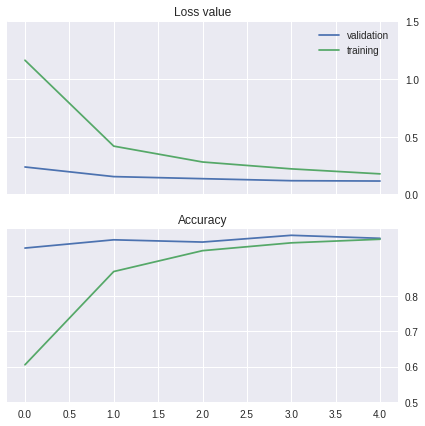

In [ ]:
plot_loss_accuracy(hist2)

### 3.InceptionV3

In [ ]:
from tensorflow.keras.applications import InceptionV3

#### Build Model

In [ ]:
incepV3 = InceptionV3(input_shape = img_size + [3], weights='imagenet', include_top=False)
print(incepV3.summary())
for layer in incepV3.layers:
  layer.trainable = False
x = Flatten()(incepV3.output)
prediction = Dense(len(num_classes), activation='softmax')(x)

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 99, 99, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 99, 99, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                       

In [ ]:
# creat model object
model = Model(inputs = incepV3.input, outputs = prediction)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 99, 99, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 99, 99, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                            

#### Train Model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
hist3 = model.fit(train_set, validation_data=test_set, epochs=15)

Epoch 1/15
34/34 [==============================] - 109s 3s/step - loss: 5.5166 - accuracy: 0.5569 - val_loss: 0.5695 - val_accuracy: 0.8702
Epoch 2/15
34/34 [==============================] - 105s 3s/step - loss: 1.0660 - accuracy: 0.8418 - val_loss: 0.7780 - val_accuracy: 0.8404
Epoch 3/15
34/34 [==============================] - 105s 3s/step - loss: 0.6202 - accuracy: 0.9010 - val_loss: 0.4387 - val_accuracy: 0.9106
Epoch 4/15
34/34 [==============================] - 107s 3s/step - loss: 0.4313 - accuracy: 0.9103 - val_loss: 0.5035 - val_accuracy: 0.9043
Epoch 5/15
34/34 [==============================] - 113s 3s/step - loss: 0.3608 - accuracy: 0.9260 - val_loss: 0.4154 - val_accuracy: 0.9128
Epoch 6/15
34/34 [==============================] - 105s 3s/step - loss: 0.2377 - accuracy: 0.9371 - val_loss: 0.5063 - val_accuracy: 0.9128
Epoch 7/15
34/34 [==============================] - 104s 3s/step - loss: 0.2369 - accuracy: 0.9445 - val_loss: 0.5232 - val_accuracy: 0.9213
Epoch 8/15
34

In [ ]:
hist3_2 = model.fit(train_set, validation_data=test_set, epochs=15)

Epoch 1/15
 2/34 [>.............................] - ETA: 1:08 - loss: 0.2285 - accuracy: 0.9531

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


34/34 [==============================] - ETA: 0s - loss: 0.1290 - accuracy: 0.9713

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 11 bytes but only got 10. Skipping tag 42037
  " Skipping tag %s" % (size, len(data), tag)


34/34 [==============================] - 114s 3s/step - loss: 0.1290 - accuracy: 0.9713 - val_loss: 0.5277 - val_accuracy: 0.9319
Epoch 2/15
34/34 [==============================] - 105s 3s/step - loss: 0.1199 - accuracy: 0.9722 - val_loss: 0.4114 - val_accuracy: 0.9447
Epoch 3/15
34/34 [==============================] - 107s 3s/step - loss: 0.1165 - accuracy: 0.9759 - val_loss: 0.5919 - val_accuracy: 0.9298
Epoch 4/15
34/34 [==============================] - 105s 3s/step - loss: 0.0859 - accuracy: 0.9824 - val_loss: 0.4074 - val_accuracy: 0.9319
Epoch 5/15
34/34 [==============================] - 105s 3s/step - loss: 0.1442 - accuracy: 0.9685 - val_loss: 0.8568 - val_accuracy: 0.9128
Epoch 6/15
34/34 [==============================] - 105s 3s/step - loss: 0.1845 - accuracy: 0.9611 - val_loss: 0.6152 - val_accuracy: 0.9085
Epoch 7/15
34/34 [==============================] - 103s 3s/step - loss: 0.1374 - accuracy: 0.9722 - val_loss: 0.6872 - val_accuracy: 0.9043
Epoch 8/15
34/34 [======

In [ ]:
model2 = model
modelname = "incepV3_2"
model.save(model_path + modelname + ".hdf5")

### Model Eval and Comparision

In [ ]:
def plot_loss_accuracy(hist):
    plt.figure(1)
    plt.subplot(211)
    plt.plot(hist.history['val_loss'], label="validation")
    plt.plot(hist.history['loss'],label="training")
    plt.yticks([0.00,0.50,1.00,1.50])
    plt.title('Loss value',fontsize=12)

    ax          = plt.gca()
    ax.set_xticklabels([])

    plt.subplot(212)
    plt.plot(hist.history['val_accuracy'],label="validation")
    plt.plot(hist.history['accuracy'],label="training")
    plt.yticks([0.5,0.6,0.7,0.8])
    plt.title('Accuracy',fontsize=12)
    ax.legend()
    plt.show()

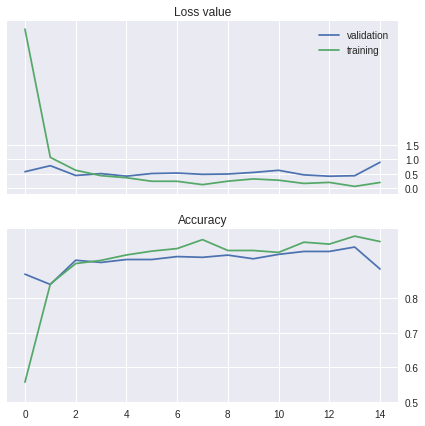

In [ ]:
# hist1 = hist
# plot_loss_accuracy(hist1)
# plot_loss_accuracy(hist2)
plot_loss_accuracy(hist3)

In [ ]:
train_loss, train_acc = model.evaluate(train_set)
test_loss, test_acc   = model.evaluate(test_set)
print("final train accuracy = {:.2f} , test accuracy = {:.2f}".format(train_acc*100, test_acc*100))


15/15 [==============================] - 32s 2s/step - loss: 0.8967 - accuracy: 0.8851
final train accuracy = 94.54 , test accuracy = 88.51
